<a href="https://colab.research.google.com/github/LucianoPer/VPC2/blob/main/2_CNN_Redes_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CNN - Redes convolucionales implementadas en keras con modelos secuenciales

Vamos a crear una red neuronal convolucional para entrenar imagenes de numeros con el paquete de MNIST

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

from keras.datasets import mnist

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Convolucion**

*Conv2D( numero_filtros, tamano_filtro , input_shape=(28, 28, 1))*

**Pooling**

*MaxPooling2D(pool_size)*



In [ ]:
# VAMOS A CREAR UNA RED CONVOLUCIONAL SIMPLE CON UN MODELO SECUENCIAL DE KERAS
# No utilizamos padding ni stride 

model = Sequential()
model.add( Conv2D(8 ,kernel_size=(3,3), input_shape=(28,28,1)) )
# Salida --->> 28 - 3 + 1 = 26 -->> [26x26x8]
model.add( MaxPooling2D(pool_size=(2,2)))
# Salida --->> 26 / 2 = 13 -->> [13x13x8]
model.add( Flatten())
# Salida --->> 13x13x8 = 1352
model.add( Dense(10, activation = "softmax") )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


###Cargamos las imagenes de MNIST para entrenar y evaluar nuestro modelo 

In [ ]:
# CARGA DEL DATASET 
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

# 60 mil imagenes de 28x28x1 (grises) / 10 mil imagenes para test
print('Train Shape : ',X_train.shape)
print('Test Shape : ',X_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train Shape :  (60000, 28, 28)
Test Shape :  (10000, 28, 28)


In [ ]:
# Definimos una funcion que grafique las primeras imagenes
def Plotear_Im(X_train):
  for i in range(9):
    # 331 --> primer imagen en matriz 3x3
    plt.subplot(330+1+i)
    plt.imshow(X_train[i] , cmap=plt.get_cmap('gray'))
  plt.show()

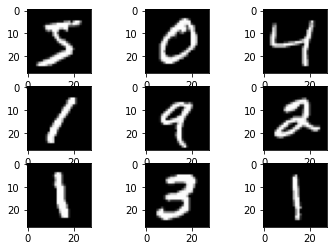

In [ ]:
Plotear_Im(X_train)

**Normalizacion** de los valores de la imagen : Los pixeles de las imagenes toman valores de 0 a 255. Al normalizarlos estos tomaran valores de 0 a 1, y si luego restamos 0.5, estamos haciendo que le media valga cero y la varianza 1. Al hacer esto logramos reducir el tiempo de computo  y mejorar la convergencia a mejores minimos logrando que ningun elemento de la activacion sea mas dominante que otro. 

In [ ]:
# Normalizamos las imagenes y las centramos 
X_train_n = (X_train/255) - 0.5
X_test_n = (X_test/255) - 0.5

In [ ]:
# Hacemos un reshape para que las imagenes tengan una dimension mas indicando el canal [28x28] --->>> [28x28x1]
X_train_n = X_train_n.reshape((X_train_n.shape[0],28,28,1))
X_test_n = X_test_n.reshape((X_test_n.shape[0],28,28,1))
X_train_n.shape

(60000, 28, 28, 1)

Transformamos los valores numericos de la salida (target) a ONE-HOT Encoding, Esto lo hacemos para romper la relacion de orden que tiene el target, ya que son valores enteros (1,2,3,4,5....) y asi evitar que nuestro modelo aprenda esa relacion de orden, y forzarlo a aprender una etiqueta que no posee orden general. De otro modo nuestro modelo podria ser sensible al orden del target lo cual no seria correcto para clasificar imagenes aleatorias. 

In [ ]:
# Transformamos el target a variables categoricas ONE HOT ENCODING
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


###Entrenamiento del modelo

In [ ]:
model.compile( 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_n,y_train_cat,epochs=10,validation_data=(X_test_n,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3465 - accuracy: 0.9000 - val_loss: 0.1880 - val_accuracy: 0.9465
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1646 - accuracy: 0.9526 - val_loss: 0.1346 - val_accuracy: 0.9604
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1188 - accuracy: 0.9663 - val_loss: 0.1022 - val_accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9731 - val_loss: 0.0931 - val_accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0834 - accuracy: 0.9762 - val_loss: 0.0827 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0742 - accuracy: 0.9781 - val_loss: 0.0843 - val_accuracy: 0.9732
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0671 - accuracy: 0.9805 - val_loss: 0.0782 - val_accuracy:

Valores Reales :  [7 2 1 0 4 1 4 9 5]
Predicciones :  [7 2 1 0 4 1 4 9 5]


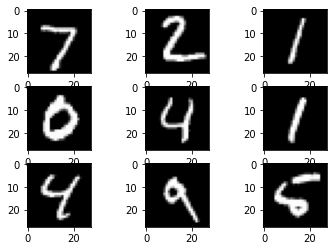

In [ ]:
print('Valores Reales : ',y_test[0:9])
predicciones = model.predict(X_test_n[:9])
print('Predicciones : ',np.argmax(predicciones, axis=1))
Plotear_Im(X_test[:9])

##2-  Creamos otro Modelo con mas capas convolucionales y exploramos las capas internas 

In [ ]:
model2 = Sequential()
model2.add(Conv2D(8 , kernel_size=(3,3), input_shape=(28,28,1)))
# Salida ---> 28 - 3 + 1 = 26x26x8
model2.add(MaxPooling2D(pool_size=(2,2)))
# Salida ----> 13x13x8
model2.add(Conv2D(16, kernel_size=(3,3)))
# Salida ---> 13 - 3 + 1 = 11x11x16
model2.add(MaxPooling2D(pool_size=(2,2)))
# Salida ---> 5x5x16
model2.add(Conv2D(32, kernel_size=(3,3)))
# Salida ---> 5 - 3 + 1 =3x3x32
model2.add(MaxPooling2D(pool_size=(2,2)))
# Salida ---> 1x1x32
model2.add(Flatten())
# salida ---> 32
model2.add(Dense(10 , activation= 'softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(X_train_n,y_train_cat,epochs=10, validation_data=(X_test_n,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3104 - accuracy: 0.9048 - val_loss: 0.1371 - val_accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1220 - accuracy: 0.9626 - val_loss: 0.0949 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0942 - accuracy: 0.9717 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 0.0774 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.0832 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0706 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9811 - val_loss: 0.0666 - val_accuracy:

Valores Reales :  [9 0 6 9 0 1 5 9 7]


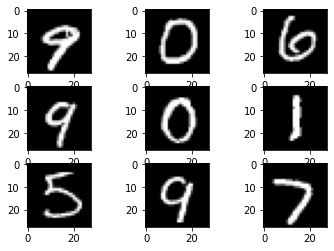

Predicciones :  [9 0 6 9 0 1 5 9 7]


In [ ]:
print('Valores Reales : ',y_test[9:18])
predicciones = model2.predict(X_test_n[9:18])
Plotear_Im(X_test[9:18])
print('Predicciones : ',np.argmax(predicciones, axis=1))


## Inspeccionamos que ocurre con las imagenes luego de pasar por las capas convolucionales 

In [ ]:
# DEFINIMOS UNA FUNCION QUE CREA UN MODELO TRUNCADO EN LA CAPA QUE QUEREMOS INSPECCIONAR CON LOS PESOS DEL MODELO YA ENTRENADO ANTERIORMENTE
def truncate_model(trained_model):
  model = Sequential()
  # La siguiente capa es la que observaremos
  model.add(Conv2D(8,kernel_size=(3,3), input_shape=(28,28,1)))
  # obtenemos los pesos del modelo entrenado y lo seteamos a las capas de nuestro modelo truncado
  for i, layer in enumerate(model.layers):
    layer.set_weights(trained_model.layers[i].get_weights()) 
  # Compilamos y retornamos el modelo truncado
  model.compile(optimizer='adam', loss='categorizal_crossentropy',metrics=['accuracy'])
 
  return model

In [ ]:
# Creamos nuestro modelo truncado en la primer capa convolucional para observar las imagenes
truncated_model = truncate_model(model2)
hidden_features =  truncated_model.predict(X_test_n[9:18])

print('Dimension de salida de la capa convolucional ',hidden_features.shape)

Dimension de salida de la capa convolucional  (9, 26, 26, 8)


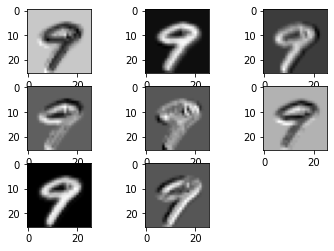

In [ ]:
# Ploteamos las imagenes luego de la primer convolucion
for i in range(8):
	plt.subplot(330 + 1 + i)
	plt.imshow(hidden_features[0,:,:,i], cmap=plt.get_cmap('gray'))
plt.show()

Agregamos una capa de pooling y una convolucional y observamos nuevamente que ocurre con la salida, Se podran observar los filtros para detectar bordes

In [ ]:
# Agregamos una capa convolucional mas 
def truncated_model2(trained_model):
   model = Sequential()
   model.add(Conv2D(8,kernel_size=(3,3),input_shape = (28,28,1))) 
   model.add(MaxPooling2D(pool_size=(2,2)))
   model.add(Conv2D(16,kernel_size=(3,3)))
   
   for i, layer in enumerate(model.layers):
      layer.set_weights(trained_model.layers[i].get_weights())
 
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   return model

In [ ]:
truncated_model2 = truncated_model2(model2)
hidden_features2 = truncated_model2.predict(X_test_n[9:18])

In [ ]:
print('Dimension de salida de la segunda capa convolucional ',hidden_features2.shape)

Dimension de salida de la segunda capa convolucional  (9, 11, 11, 16)


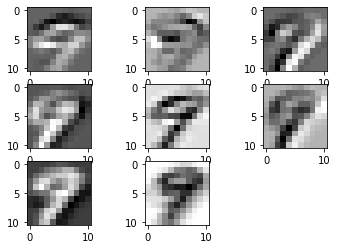

In [ ]:
for i in range(8):
	plt.subplot(330 + 1 + i)
	plt.imshow(hidden_features2[0,:,:,i], cmap=plt.get_cmap('gray'))
plt.show()

Veamos que diferencia hay si a las **capas convolucionales** le agregamos una **activacion 'relu'**. Hay variacion en las imagenes de salida ?

In [ ]:
model3 = Sequential()
model3.add(Conv2D(8 , kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
# Salida ---> 28 - 3 + 1 = 26x26x8
model3.add(MaxPooling2D(pool_size=(2,2)))
# Salida ----> 13x13x8
model3.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
# Salida ---> 13 - 3 + 1 = 11x11x16
model3.add(MaxPooling2D(pool_size=(2,2)))
# Salida ---> 5x5x16
model3.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
# Salida ---> 5 - 3 + 1 =3x3x32
model3.add(MaxPooling2D(pool_size=(2,2)))
# Salida ---> 1x1x32
model3.add(Flatten())
# salida ---> 32
model3.add(Dense(10 , activation= 'softmax'))

In [ ]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(X_train_n,y_train_cat,epochs=10, validation_data=(X_test_n,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3606 - accuracy: 0.8893 - val_loss: 0.1280 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9633 - val_loss: 0.1073 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0936 - accuracy: 0.9705 - val_loss: 0.0826 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0804 - accuracy: 0.9749 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0685 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9813 - val_loss: 0.0621 - val_accuracy:

In [ ]:
# DEFINIMOS UNA FUNCION QUE CREA UN MODELO TRUNCADO EN LA CAPA QUE QUEREMOS INSPECCIONAR CON LOS PESOS DEL MODELO YA ENTRENADO ANTERIORMENTE
def truncate_model3(trained_model):
  model = Sequential()
  # La siguiente capa es la que observaremos
  model.add(Conv2D(8,kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))

  # obtenemos los pesos del modelo entrenado y lo seteamos a las capas de nuestro modelo truncado
  for i, layer in enumerate(model.layers):
    layer.set_weights(trained_model.layers[i].get_weights()) 
  # Compilamos y retornamos el modelo truncado
  model.compile(optimizer='adam', loss='categorizal_crossentropy',metrics=['accuracy'])
 
  return model

In [ ]:
# Creamos nuestro modelo truncado en la primer capa convolucional para observar las imagenes
truncated_model = truncate_model3(model3)
hidden_features =  truncated_model.predict(X_test_n[9:18])

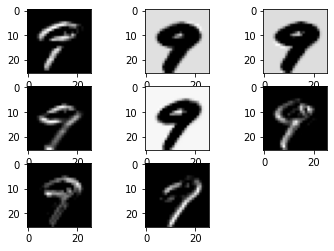

In [ ]:
# Ploteamos las imagenes luego de la primer convolucion
for i in range(8):
	plt.subplot(330 + 1 + i)
	plt.imshow(hidden_features[0,:,:,i], cmap=plt.get_cmap('gray'))
plt.show()

###**Entrenando Redes convolucionales para identificar señas**

Para emtrenar esta red necesitamos cargar el archivo que contiene las imagenes de manos con diferentes señas, donde cada uno representa un numero. 

In [ ]:
# CARGAR EL ARCHIVO ZIP QUE CONTIENE LAS IMAGENES
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
# Descomprimimos el zip 
!unzip dataset.zip

Archive:  dataset.zip
  inflating: cnn_utils.py            
   creating: datasets/
  inflating: datasets/test_signs.h5  
  inflating: datasets/train_signs.h5  


In [ ]:
# Cargamos los datasets 
from cnn_utils import *
X_train_orig, y_train_orig, X_test_orig, y_test_orig, classes =  load_dataset()

In [ ]:
print('dimension dataset de train :',X_train_orig.shape)
print('dimension dataset de test :',X_test_orig.shape)

dimension dataset de train : (1080, 64, 64, 3)
dimension dataset de test : (120, 64, 64, 3)


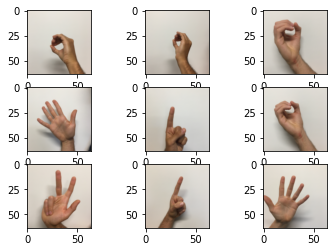

In [ ]:
Plotear_Im(X_test_orig[:9,:,:,:])

Las imagenes corresponden a un dataset llamado SIGNS con seis digitos representando a numeros de 0 a 5.

In [ ]:
# Normalizamos los datos 
X_train_orig_n = X_train_orig/255
X_test_orig_n = X_test_orig/255

In [ ]:
y_train_orig.shape

(1, 1080)

In [ ]:
# Debemos transponer y_train ya que es una matriz de 1x1080
y_train_c = to_categorical(y_train_orig.T)
y_test_c  = to_categorical(y_test_orig.T)
print('Dimensiones de y train :',y_train_c.shape)
print('Dimensiones de y test :',y_test_c.shape)

Dimensiones de y train : (1080, 6)
Dimensiones de y test : (120, 6)


###Parametros de las capas Convolucionales y de Pooling

Capa Convolucional:

`Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)`


Capa Max Pooling, la función tiene estos parámetros: 

`MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)`

Capa Flatten:

`Flatten(
    data_format=None, **kwargs
)`

Capa Dense:

`Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)`


In [ ]:
model3 = Sequential()
model3.add(Conv2D(8,kernel_size=(4,4), strides=1,padding='same',input_shape=(64,64,3),activation='relu'))
# Salida --->(padding same agrega tantos ceros para que la salida sea igual a la entrada) --> 64x64x8
model3.add(MaxPooling2D(pool_size=(8,8),strides=8,padding='same'))
# Salida --> 64 -8 /8 + 1 = 8 --> 8x8x8
model3.add(Conv2D(16,kernel_size=(2,2), strides=1,padding='same',input_shape=(64,64,3),activation='relu'))
# Salida --->8x8x16
model3.add(MaxPooling2D(pool_size=(4,4),strides=4,padding='same'))
# Salida --> 8 -4 /4 + 1 = 2 --> 2x2x16
model3.add(Flatten())
model3.add(Dense(6,activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
___________________________________________________

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.fit(X_train_orig_n,y_train_c,epochs=100,batch_size=128, validation_data=(X_test_orig_n,y_test_c))

Epoch 1/100
9/9 [==============================] - 0s 37ms/step - loss: 1.8174 - accuracy: 0.1593 - val_loss: 1.7913 - val_accuracy: 0.1333
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 1.7859 - accuracy: 0.1694 - val_loss: 1.7800 - val_accuracy: 0.2583
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 1.7664 - accuracy: 0.3139 - val_loss: 1.7573 - val_accuracy: 0.3083
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 1.7235 - accuracy: 0.3093 - val_loss: 1.7209 - val_accuracy: 0.2500
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.6460 - accuracy: 0.2981 - val_loss: 1.6674 - val_accuracy: 0.3167
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 1.5515 - accuracy: 0.3815 - val_loss: 1.6156 - val_accuracy: 0.3500
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 1.4947 - accuracy: 0.4000 - val_loss: 1.5672 - val_accuracy: 0.3750
Epoch 8/100
9/9 [===

Valores reales:  [5 1 3 1 1 3]


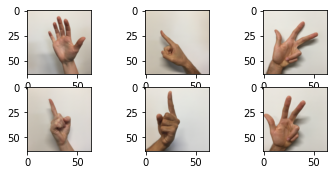

valores prediccion :  [5 1 4 1 1 3]


In [ ]:
predicciones = model3.predict(X_test_orig_n[10:16])

print('Valores reales: ',np.argmax(y_test_c[10:16], axis=1))

# Plotear esas imágenes
for i in range(6):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_test_orig[10+i], cmap=plt.get_cmap('gray'))
plt.show()

print('valores prediccion : ',np.argmax(predicciones,axis=1))

###Evaluamos otro modelo similar pero sin las activaciones dentro de las capas de convolucion : 
Aqui vamos a observar que el modelo mejora la performance

In [ ]:
model4 = Sequential()
model4.add(Conv2D(8,kernel_size=(4,4), strides=1,padding='same',input_shape=(64,64,3)))
# Salida --->(padding same agrega tantos ceros para que la salida sea igual a la entrada) --> 64x64x8
model4.add(MaxPooling2D(pool_size=(8,8),strides=8,padding='same'))
# Salida --> 64 -8 /8 + 1 = 8 --> 8x8x8
model4.add(Conv2D(16,kernel_size=(2,2), strides=1,padding='same',input_shape=(64,64,3)))
# Salida --->8x8x16
model4.add(MaxPooling2D(pool_size=(4,4),strides=4,padding='same'))
# Salida --> 8 -4 /4 + 1 = 2 --> 2x2x16
model4.add(Flatten())
model4.add(Dense(6,activation='softmax'))

In [ ]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
___________________________________________________

Para calcular la cantidad de parametros que tiene una **capa de convolucion** dentro de la red debemos aplicar la siguiente formula :

\begin{equation}
N_p =  f * f *n_c^{l-1} * n_c +n_c  
\end{equation}

donde l-1 indica que se trata de la capa anterior. Aplicandolo a la primer capa convolucional  

\begin{equation}
N_{conv1} =  4 * 4 * 3 * 8 +8 = 392  
\end{equation}

\begin{equation}
N_{conv2} =  2 * 2 * 8 * 16 +16 = 528  
\end{equation}

Las **capas de pooling** no tienen parametros entrenables. 

El numero de parametros entrenables de la **capa Densa** es :
\begin{equation}
N_D =  n^{l-1} * n +n  
\end{equation}

Aplicamos la formula a la ultima capa Densa de la red:
\begin{equation}
N_D =  64 * 6 +6 = 390  
\end{equation}

In [ ]:
model4.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

model4.fit(X_train_orig_n,y_train_c,epochs=100,batch_size=128, validation_data=(X_test_orig_n,y_test_c))

Epoch 1/100
9/9 [==============================] - 0s 24ms/step - loss: 2.2929 - accuracy: 0.1991 - val_loss: 2.6662 - val_accuracy: 0.1667
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 2.3955 - accuracy: 0.1685 - val_loss: 1.9897 - val_accuracy: 0.1667
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 1.8473 - accuracy: 0.2009 - val_loss: 1.7463 - val_accuracy: 0.3000
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 1.6714 - accuracy: 0.3056 - val_loss: 1.8037 - val_accuracy: 0.2083
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.5467 - accuracy: 0.3657 - val_loss: 1.4485 - val_accuracy: 0.4500
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 1.3708 - accuracy: 0.4833 - val_loss: 1.4235 - val_accuracy: 0.3417
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 1.3097 - accuracy: 0.4833 - val_loss: 1.3609 - val_accuracy: 0.4750
Epoch 8/100
9/9 [===

El unico cambio que se realizo en este modelo respecto al anterior fue quitar las activaciones a la salida de las convoluciones, el modelo mejoro significativamente. 

### Comparacion de de Redes con Pooling y sin Pooling

Usaremos el dataset de fashion MNIST que contiene imagenes de distintas prendas de vestir

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
type(fashion_mnist)

module

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data();
print('Las dimensiones del dataset de X_train es : ', X_train.shape)
print('Las dimensiones del dataset de y_train es :',y_train.shape)
print('Las dimensiones del dataset de X_test es :',X_test.shape)
print('Las dimensiones del dataset de y_test es :',y_test.shape)

Las dimensiones del dataset de X_train es :  (60000, 28, 28)
Las dimensiones del dataset de y_train es : (60000,)
Las dimensiones del dataset de X_test es : (10000, 28, 28)
Las dimensiones del dataset de y_test es : (10000,)


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Agregamos una dimension a las imagenes para lograr que cada una tenga las dimensiones  [*28x28x1*]. Luego Normalizamos

In [ ]:
X_train =  X_train.reshape((60000,28,28,1))
X_test =  X_test.reshape((10000,28,28,1))

# NORMALIZAMOS LOS DATOS
X_train_n = X_train/255
X_test_n = X_test/255

In [ ]:
# PASAMOS A ONE-HOT ENCODING los valores del target
print('Categorias : ',np.unique(y_train))
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)
print("One Hot E : ",y_train_c[0])

Categorias :  [0 1 2 3 4 5 6 7 8 9]
One Hot E :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# PARTIMOS EL TRAIN EN train y validation 
X_train_,X_valid_ = X_train_n[:50000],X_train_n[50000:]
y_train_,y_valid_ = y_train_c[:50000],y_train_c[50000:]
X_test_ = X_test_n


###Modelo **CON** Pooling 

In [ ]:
model_a = Sequential()

model_a.add(Conv2D(filters=32, kernel_size = (3,3), strides = 1, padding='valid', input_shape = (28,28,1), activation='relu' ))
# 28 - 3 + 1 =  26x26x32  #Param 3x3x1x32 + 32 = 320
model_a.add(MaxPooling2D(2,2))
# /2 = 13x13x32
model_a.add(Flatten())
# 5408
model_a.add(Dense(300,activation='relu'))
#Param 1.622.700
model_a.add(Dense(100,activation='relu'))
#Param 300x100 + 100 = 30100
model_a.add(Dense(10, activation='softmax'))

###Modelo **SIN** Pooling 

In [ ]:
model_b = Sequential()

model_b.add(Conv2D(filters=32, kernel_size = (3,3), strides = 2, padding='valid', input_shape = (28,28,1), activation='relu' ))
# 28 + - 3 /2 + 1 =  13x13x32  #Param 3x3x1x32 + 32 = 320
model_b.add(Flatten())
# 5408
model_b.add(Dense(300,activation='relu'))
#Param 1.622.700
model_b.add(Dense(100,activation='relu'))
#Param 300x100 + 100 = 30100
model_b.add(Dense(10, activation='softmax'))

Compilamos y evaluamos los modelos 

In [ ]:
model_a.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model_b.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_a = model_a.fit(X_train_,y_train_, epochs=30, batch_size=128, validation_data=(X_valid_,y_valid_))

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 1.1184 - accuracy: 0.6378 - val_loss: 0.6868 - val_accuracy: 0.7422
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6074 - accuracy: 0.7826 - val_loss: 0.6471 - val_accuracy: 0.7501
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5427 - accuracy: 0.8041 - val_loss: 0.5060 - val_accuracy: 0.8195
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5031 - accuracy: 0.8202 - val_loss: 0.5190 - val_accuracy: 0.8137
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4792 - accuracy: 0.8284 - val_loss: 0.5781 - val_accuracy: 0.7722
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4546 - accuracy: 0.8390 - val_loss: 0.4587 - val_accuracy: 0.8357
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.4424 - accuracy: 0.8413 - val_loss: 0.4417 - val_accuracy: 0.8414
Epoch 

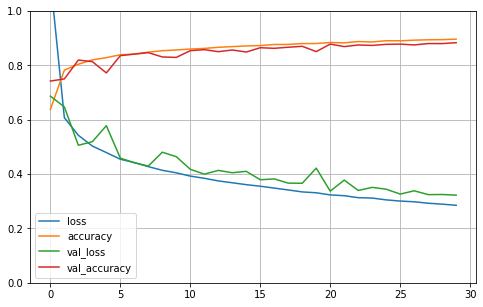

In [ ]:
pd.DataFrame(history_a.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
eval = model_a.evaluate(X_test_,y_test_c)

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8784


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
valores Reales : [9 2 1 1 6 1]
Predicciones :  [9 2 1 1 6 1]


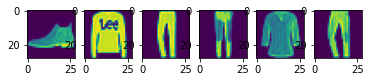

In [ ]:
y_pred =  model_a.predict_classes(X_test_[:6])
print('valores Reales :',y_test[:6])
print('Predicciones : ',y_pred)
for i in range(6):
  plt.subplot(160 + 1+ i)
  plt.imshow(X_test[i,:,:,0])
plt.show()

In [ ]:
for i in y_pred:
  print(class_names[i])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser


In [ ]:
history_b = model_b.fit(X_train_,y_train_, epochs=30, batch_size=128, validation_data=(X_valid_,y_valid_))

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 1.1555 - accuracy: 0.6314 - val_loss: 0.6656 - val_accuracy: 0.7662
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6110 - accuracy: 0.7825 - val_loss: 0.5788 - val_accuracy: 0.7763
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.5415 - accuracy: 0.8047 - val_loss: 0.5082 - val_accuracy: 0.8200
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.8195 - val_loss: 0.5881 - val_accuracy: 0.7869
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4800 - accuracy: 0.8296 - val_loss: 0.4894 - val_accuracy: 0.8259
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4598 - accuracy: 0.8393 - val_loss: 0.4882 - val_accuracy: 0.8204
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4466 - accuracy: 0.8416 - val_loss: 0.4620 - val_accuracy: 0.8336
Epoch 

Podemos usar el **target** sin condificar con **ONE-HOT Encoding** pero debemos cambiar la funcion de loss de **categorical_crossentrpy** a **sparse_categorical_crossentropy**

In [ ]:
model_c = Sequential()

model_c.add(Conv2D(filters=32, kernel_size = (3,3), strides = 1, padding='valid', input_shape = (28,28,1), activation='relu' ))
# 28 - 3 + 1 =  26x26x32  #Param 3x3x1x32 + 32 = 320
model_c.add(MaxPooling2D(2,2))
# /2 = 13x13x32
model_c.add(Flatten())
# 5408
model_c.add(Dense(300,activation='relu'))
#Param 1.622.700
model_c.add(Dense(100,activation='relu'))
#Param 300x100 + 100 = 30100
model_c.add(Dense(10, activation='softmax'))

model_c.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
y_train_orig, y_valid_orig = y_train[:50000],y_train[50000:]
history_c = model_c.fit(X_train_,y_train_orig, epochs=30, batch_size=128, validation_data=(X_valid_,y_valid_orig))

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 1.0459 - accuracy: 0.6650 - val_loss: 0.6961 - val_accuracy: 0.7508
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6134 - accuracy: 0.7815 - val_loss: 0.6257 - val_accuracy: 0.7592
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5421 - accuracy: 0.8063 - val_loss: 0.5422 - val_accuracy: 0.8008
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.8196 - val_loss: 0.4874 - val_accuracy: 0.8241
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4760 - accuracy: 0.8303 - val_loss: 0.4634 - val_accuracy: 0.8355
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.8377 - val_loss: 0.4716 - val_accuracy: 0.8331
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.4375 - accuracy: 0.8444 - val_loss: 0.5291 - val_accuracy: 0.7944
Epoch 

Podemos observar que el resultado del entrenamiento del modelo no se ve alterado. 

Respecto a redes con pooling y sin pooling para notar la diferencia deberiamos probar con mas capas convolucionales y pooling y verificar los resultaos. 

### **Particularidades de la redes convolucionales**

- A medida que avanzamos en las capas convolucionales lo que ocurre normalmente es que n_h y n_w (cantidad de pixeles de ancho y alto de la imagen) disminuyen mientras la cantidad de canales o profundidad de la imagen aumenta proporcioanalmente con la cantidad de filtros convolucionales que utilicemos.

- Generalmente se utilizan capas convolucionales seguidas de capas de Pooling. Las capas convolucionales logran que el modelo sea invariante a ciertas transformaciones de la entrada, ademas de eso al aplicar la convolucion en cada region de la imagen con un filtro de tamano fxf se comparten los parametros de distintas regiones de la imagen. Utilizar capas convolucionales ayuda a disminuir la probabilidad de overfitting (hay menos parametros).

- Las conexiones de una red convolucional son esparsas, es decir que cada activacion depende de unas pocas activaciones de la capa anterior. Esto quiere decir que por ejemplo un pixel de la capa siguiente solo dependera de las activaciones (pixeles) que forman parte de la capa que se convoluciona con  filtro. 